<img src="./figuras/cropped-Logos-diplomatura-hd-2.png" width="500"/>

<img src="./figuras/florencia.jpg" width="500"/>

# Ejemplo 1 - Familias florentinas

## Nociones básicas de grafos

En esta notebook vamos a reforzar algunos conceptos básicos de teoría de grafos vistos en clase, utilizando a modo de ejemplo el dataset "Familias florentinas".

## Descripción del dataset

El dataset consiste en un grafo con 15 nodos y 20 enlaces.

Cada nodo representa una familia importante de la Florencia renacentista, identificada por su apellido. Dos nodos están unidos por un enlace si existió algún matrimonio entre miembros de las correspondientes familias.


<u>Referencias:</u>

- J. F. Padgett and C. K. Ansel, *Robust Action and the Rise of the Medici, 1400-1434*, AJS Volume 98 Number 6 (1993) 1259-1319.

- R. L. Breiger, et al., *Cumulated Social Roles: The Duality of Persons and Their Algebras*, Social Networks 8 (1986) 215-256.

## Configuración inicial

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importamos el grafo

In [2]:
G = nx.florentine_families_graph()
print(f'Cantidad de nodos: {G.number_of_nodes()}')
print(f'Cantidad de links: {G.number_of_edges()}')

Cantidad de nodos: 15
Cantidad de links: 20


## Representación del grafo

### Matriz de adyacencia

En un grafo simple y no pesado, la matriz de adyacencia se define de la siguiente forma

$$
A_{ij} = 
\begin{cases}
1 & \text{si existe enlace de } i \text{ a } j \\
0 & \text{caso contrario}
\end{cases}
$$

In [3]:
A = nx.adjacency_matrix(G)
print('Tipo de dato:', type(A), end='\n\n')
print('Matriz de adjacencia', end='\n\n')
print('A=\n', A.todense())

Tipo de dato: <class 'scipy.sparse._csr.csr_matrix'>

Matriz de adjacencia

A=
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


### Lista de adyacencia

Cada elemento de la lista representa a un nodo, y contiene el conjunto de vecinos del mismo.

In [4]:
def get_adjacency_list(G):
    """
    Construye la lista de adyacencia del grafo G
    """
    adjlist = []
    for v in G.nodes():
        neighbor_set = set(list(G.neighbors(v)))
        adjlist.append((v, neighbor_set))
    return adjlist

def print_adjacency_list(adjlist):
    """
    Imprime la lista de adyacencia en pantalla
    """
    for v, neighbors in adjlist:
        print(f'{v:14} {neighbors}')

adjlist = get_adjacency_list(G)
print('Lista de adyacencia', end='\n\n')
print_adjacency_list(adjlist)

Lista de adyacencia

Acciaiuoli     {'Medici'}
Medici         {'Acciaiuoli', 'Salviati', 'Albizzi', 'Barbadori', 'Tornabuoni', 'Ridolfi'}
Castellani     {'Barbadori', 'Strozzi', 'Peruzzi'}
Peruzzi        {'Bischeri', 'Castellani', 'Strozzi'}
Strozzi        {'Bischeri', 'Castellani', 'Ridolfi', 'Peruzzi'}
Barbadori      {'Castellani', 'Medici'}
Ridolfi        {'Tornabuoni', 'Strozzi', 'Medici'}
Tornabuoni     {'Ridolfi', 'Guadagni', 'Medici'}
Albizzi        {'Ginori', 'Guadagni', 'Medici'}
Salviati       {'Pazzi', 'Medici'}
Pazzi          {'Salviati'}
Bischeri       {'Guadagni', 'Strozzi', 'Peruzzi'}
Guadagni       {'Albizzi', 'Lamberteschi', 'Bischeri', 'Tornabuoni'}
Ginori         {'Albizzi'}
Lamberteschi   {'Guadagni'}


### Visualización

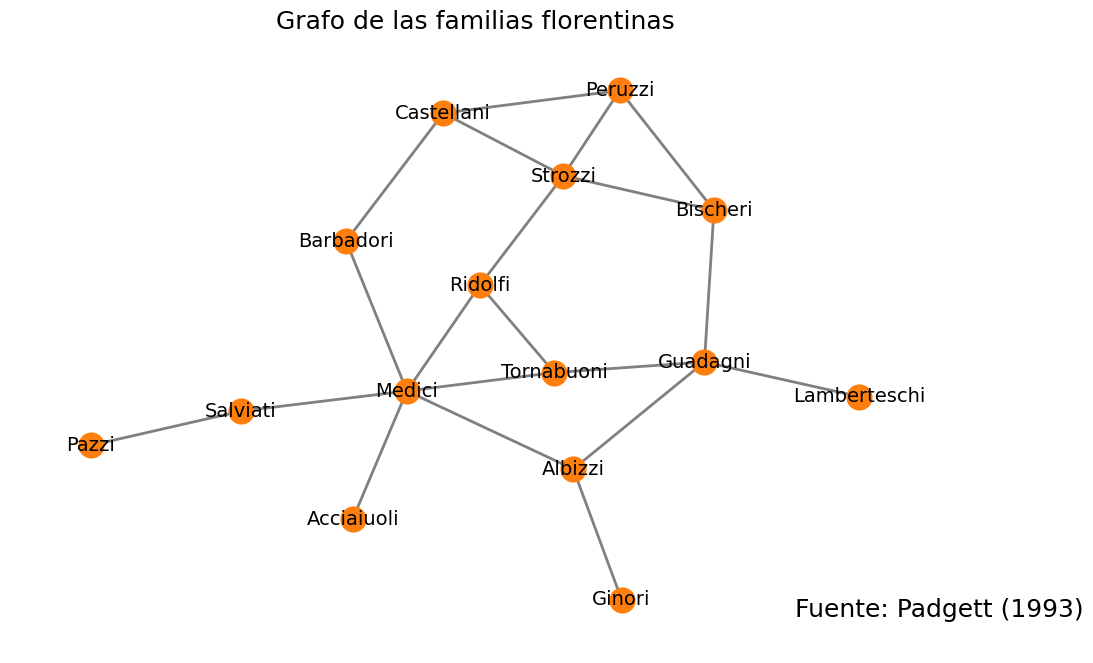

In [5]:
draw_params = dict(
    with_labels=True,               ## Incluye los nombres de los nodos
    node_color='C1',                ## Elijo el color 1 de la paleta de colores
    edge_color='gray',
    width=2,                        ## Espesor de los enlaces
    font_size=14,
    label='Familias florentinas',
    pos=nx.kamada_kawai_layout(G)   ## Algoritmo para embeber el grafo en el plano
)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Grafo de las familias florentinas')
ax.text(0.7, -0.8, 'Fuente: Padgett (1993)')
nx.draw(
    G, 
    ax=ax,
    **draw_params
)

## Estadística de los nodos

Construimos un DataFrame de pandas para almacenar la estadística de los nodos

In [6]:
df = pd.DataFrame(index=list(G.nodes()))
df

""
Acciaiuoli
Medici
Castellani
Peruzzi
Strozzi
Barbadori
Ridolfi
Tornabuoni
Albizzi
Salviati


### Distribución de grado

In [7]:
print(G.degree())

[('Acciaiuoli', 1), ('Medici', 6), ('Castellani', 3), ('Peruzzi', 3), ('Strozzi', 4), ('Barbadori', 2), ('Ridolfi', 3), ('Tornabuoni', 3), ('Albizzi', 3), ('Salviati', 2), ('Pazzi', 1), ('Bischeri', 3), ('Guadagni', 4), ('Ginori', 1), ('Lamberteschi', 1)]


In [8]:
deg_seq = np.array([k for v, k in G.degree()])
df['degree'] = deg_seq
df.head()

,degree
Acciaiuoli,1
Medici,6
Castellani,3
Peruzzi,3
Strozzi,4


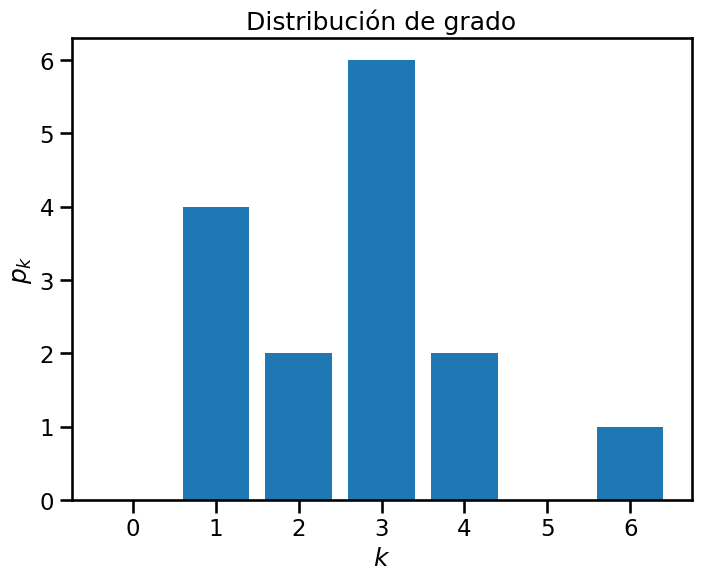

In [9]:
deg_histo = nx.degree_histogram(G)
bins = range(len(deg_histo))

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Distribución de grado')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k$')
ax.bar(bins, deg_histo)
plt.show()

### Coeficiente de clustering (transitividad)

In [10]:
clustering_coefficient = nx.clustering(G)
df['Cws'] = list(clustering_coefficient.values())

In [11]:
df

,degree,Cws
Acciaiuoli,1,0.000000
Medici,6,0.066667
Castellani,3,0.333333
Peruzzi,3,0.666667
Strozzi,4,0.333333
Barbadori,2,0.000000
Ridolfi,3,0.333333
Tornabuoni,3,0.333333
Albizzi,3,0.000000
Salviati,2,0.000000


### Centralidad

In [12]:
from utils import get_CI_nx

In [13]:
betweenness = nx.betweenness_centrality(G)
eigenvector = nx.eigenvector_centrality_numpy(G)  # Es más rápido que nx.eigenvector_centrality()
closeness = nx.closeness_centrality(G)
katz = nx.katz_centrality_numpy(G)  # Es más rápido que nx.eigenvector_centrality()
pagerank = nx.pagerank(G)
collective_influence = get_CI_nx(G)

df['betweenness'] = list(betweenness.values())
df['eigenvector'] = list(eigenvector.values())
df['closeness'] = list(closeness.values())
df['katz'] = list(katz.values())
df['pagerank'] = list(pagerank.values())
df['CI'] = collective_influence

In [14]:
df

,degree,Cws,betweenness,eigenvector,closeness,katz,pagerank,CI
Acciaiuoli,1,0.000000,0.000000,0.132154,0.368421,0.216481,0.030657,0
Medici,6,0.066667,0.521978,0.430308,0.560000,0.333825,0.145818,40
Castellani,3,0.333333,0.054945,0.259026,0.388889,0.262871,0.069330,12
Peruzzi,3,0.666667,0.021978,0.275730,0.368421,0.265080,0.067875,14
Strozzi,4,0.333333,0.102564,0.355980,0.437500,0.289870,0.088098,24
Barbadori,2,0.000000,0.093407,0.211705,0.437500,0.242768,0.050301,7
Ridolfi,3,0.333333,0.113553,0.341553,0.500000,0.272691,0.069574,20
Tornabuoni,3,0.333333,0.091575,0.325842,0.482759,0.272228,0.071279,20
Albizzi,3,0.000000,0.212454,0.243956,0.482759,0.265928,0.079122,16
Salviati,2,0.000000,0.142857,0.145917,0.388889,0.237163,0.061303,5


In [15]:
columns = ['degree', 'eigenvector', 'katz', 'pagerank', 'closeness', 'betweenness', 'CI']
data = {}
for col in columns:
    top_families = df.nlargest(3, columns=[col])[col].index
    data[col] = top_families
pd.DataFrame(data)

,degree,eigenvector,katz,pagerank,closeness,betweenness,CI
0,Medici,Medici,Medici,Medici,Medici,Medici,Medici
1,Strozzi,Strozzi,Strozzi,Guadagni,Ridolfi,Guadagni,Strozzi
2,Guadagni,Ridolfi,Guadagni,Strozzi,Tornabuoni,Albizzi,Ridolfi


Volvemos a graficar, incorporando información sobre nodos y enlaces en el gráfico

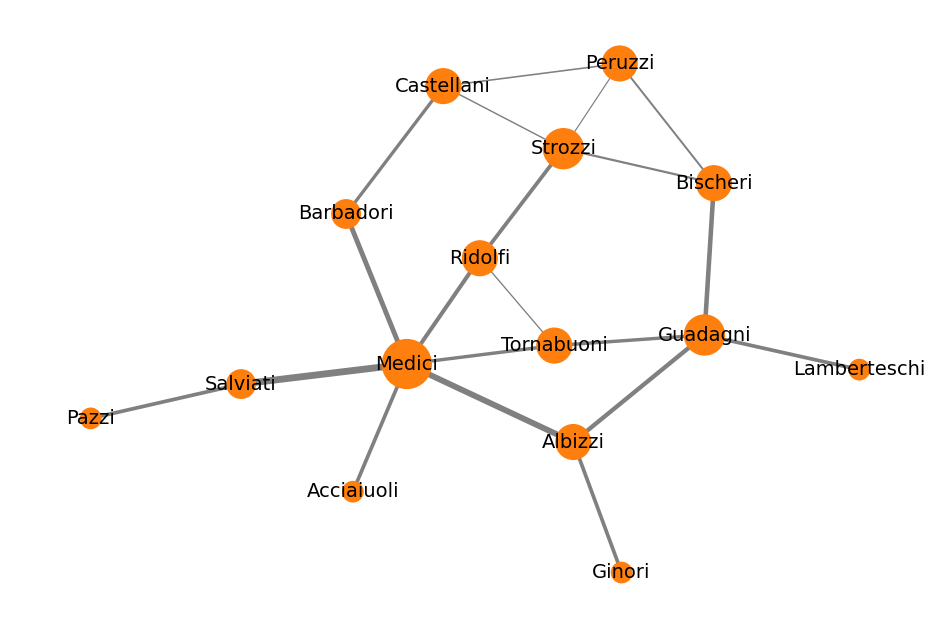

In [16]:
edge_betweenness = np.array(list(nx.edge_betweenness(G).values()))

draw_params['width'] = 20*edge_betweenness
draw_params['node_size'] = 200*df['degree']

fig, ax = plt.subplots(figsize=(12,8))
nx.draw(
    G, 
    ax=ax,
    **draw_params
)

### Atributos en NetworkX

En lugar de construir un `DataFrame` de `pandas`, podemos utilizar los atributos de `NetworkX` para almacenar los features de los nodos.

In [17]:
attributes_map = {
    'betweenness': nx.betweenness_centrality,
    'eigenvector': nx.eigenvector_centrality
}
for attribute, attr_method in attributes_map.items():
    attr_values = attr_method(G)
    nx.set_node_attributes(G, attr_values, attribute)

In [18]:
nx.get_node_attributes(G, 'betweenness')

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}